In [20]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [4]:
data = load_wine(as_frame=True)
data.frame.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, 
    random_state=42
)
scaler= StandardScaler()

# fitting only with train data
scaler.fit(X_train)


X_train = scaler.transform(X_train)
# this transformation is based on trained on training data
X_test = scaler.transform(X_test)

# Classifier

In [13]:
rf_clf = RandomForestClassifier(
    n_estimators=10,
    random_state=42)

rf_clf.fit(
    X_train,
    y_train
)
rf_clf.score(
    X_test,
    y_test
)

0.9111111111111111

In [49]:
def perm_feature_importance(
    clf,
    X,
    y,
    top_limit=None):

    bunch = permutation_importance(
        clf,
        X,
        y,
        n_repeats=50,
        random_state=42
    )

    # Avg feature importance
    imp_means = bunch.importances_mean

    ordered_imp_means_args = np.argsort(
        imp_means
    )[::-1]

    # If no limit print all features
    if top_limit is None:
        top_limit = len(ordered_imp_means_args)

    # Print relevant information

    imp_feature_index = []
    imp_feature_names = []
    for i, _ in zip(ordered_imp_means_args,
                    range(top_limit)):
        name = data.feature_names[i]
        # In case of want to see top features
        imp_feature_names.append(name)
        imp_feature_index.append(i)
        imp_score = imp_means[i]
        imp_std = bunch.importances_std[i]
        print(f'Feature {name} with index {i}\n avg imp score {imp_score:.3f} +- {imp_std:.3f}\n')
    imp_x = X[:, imp_feature_index]

    return imp_x, imp_feature_index

In [50]:
new_x, imp_index = perm_feature_importance(rf_clf,
                   X_train, y_train)

Feature flavanoids with index 6
 avg imp score 0.227 +- 0.025

Feature proline with index 12
 avg imp score 0.142 +- 0.019

Feature color_intensity with index 9
 avg imp score 0.112 +- 0.023

Feature od280/od315_of_diluted_wines with index 11
 avg imp score 0.007 +- 0.005

Feature total_phenols with index 5
 avg imp score 0.003 +- 0.004

Feature malic_acid with index 1
 avg imp score 0.002 +- 0.004

Feature proanthocyanins with index 8
 avg imp score 0.002 +- 0.003

Feature hue with index 10
 avg imp score 0.002 +- 0.003

Feature nonflavanoid_phenols with index 7
 avg imp score 0.000 +- 0.000

Feature magnesium with index 4
 avg imp score 0.000 +- 0.000

Feature alcalinity_of_ash with index 3
 avg imp score 0.000 +- 0.000

Feature ash with index 2
 avg imp score 0.000 +- 0.000

Feature alcohol with index 0
 avg imp score 0.000 +- 0.000



In [38]:
def permutation_importance_viz(
    clf,
    X_train=X_train,
    y_train=y_train,
    n_repeats=50,
    training_set=True
    ):

    result = permutation_importance(
                               rf_clf,
                               X_train,
                               y_train,
                               n_repeats=n_repeats,
                               random_state=42,
                               n_jobs=2
    )
    sorted_idx = result.importances_mean.argsort()
    feature_names = [data.feature_names[i] for i in sorted_idx]

    fig, ax = plt.subplots()
    ax.boxplot(
    
    result.importances[sorted_idx].T,
    
    vert=False,
    
    labels=feature_names
    )
    if training_set:
    
        ax.set_title("Permutation Importances (train set)")
    else:
        ax.set_title("Permutation Importances (test set)")
    fig.tight_layout()

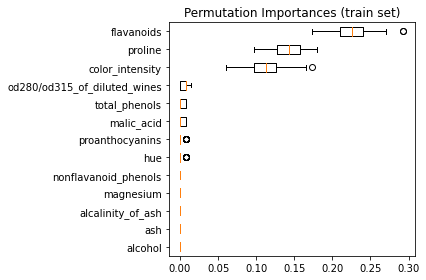

In [32]:
permutation_importance_viz(
    rf_clf,
    X_train=X_train,
    y_train=y_train,
    n_repeats=50,
    training_set=True
)

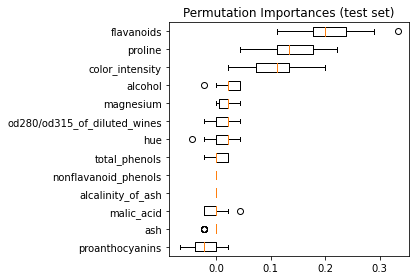

In [33]:
permutation_importance_viz(
    rf_clf,
    X_train=X_test,
    y_train=y_test,
    n_repeats=50,
    training_set=False
)

In [51]:
imp_X_train, imp_index = perm_feature_importance(rf_clf,
X_train, y_train, top_limit=3
)
imp_X_test,_ = perm_feature_importance(rf_clf,
X_test, y_test, top_limit=3
)

Feature flavanoids with index 6
 avg imp score 0.227 +- 0.025

Feature proline with index 12
 avg imp score 0.142 +- 0.019

Feature color_intensity with index 9
 avg imp score 0.112 +- 0.023

Feature flavanoids with index 6
 avg imp score 0.202 +- 0.047

Feature proline with index 12
 avg imp score 0.143 +- 0.042

Feature color_intensity with index 9
 avg imp score 0.112 +- 0.043



In [48]:
rf = RandomForestClassifier(
    n_estimators=10,
    random_state=42)
rf.fit(imp_X_train, y_train)
rf.score(imp_X_train,y_train)

1.0

In [55]:
rf.score(X_test[:, imp_index], y_test)

0.9333333333333333

In [56]:
import xgboost

ModuleNotFoundError: No module named 'xgboost'